# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import openweather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# City Generation with Improved Randomness
n_points = 2000  

# Number of latitude bands

num_bands = 10 

for _ in range(n_points):
    # Choose a random band
    band_index = np.random.randint(0, num_bands)

    # Calculate latitude range for the band
    lat_start = -90 + (180 / num_bands) * band_index
    lat_end = -90 + (180 / num_bands) * (band_index + 1)

    # Generate random lat/lng within the chosen band
    lat = np.random.uniform(lat_start, lat_end)
    lng = np.random.uniform(-180, 180)


    city_info = citipy.nearest_city(lat, lng)
    city = city_info.city_name
    country = city_info.country_code

    if not any(c["city"] == city for c in cities):  # Check for unique city names
        cities.append({"city": city, "lat": lat, "lng": lng, "country": country})

print(f"Number of unique cities found: {len(cities)}")


Number of unique cities found: 723


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"  # Base URL for OpenWeatherMap API # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city_data_point in enumerate(cities):
    city = city_data_point["city"]
    lat = city_data_point["lat"]
    lng = city_data_point["lng"]
    country = city_data_point["country"]
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}q={city},{country}&appid={openweather_api_key}&units=metric" # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # Make the API request and parse JSON  # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | gharo
Processing Record 7 of Set 1 | sant feliu de guixols
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | wangon
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | tamiahua
Processing Record 13 of Set 1 | san clemente del tuyu
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | manado
Processing Record 20 of Set 1 | zhukovka
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | edinburgh o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          680
Lat           680
Lng           680
Max Temp      680
Humidity      680
Cloudiness    680
Wind Speed    680
Country       680
Date          680
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,18.40,47,43,6.22,NZ,1738535334
1,anadyr,64.7500,177.4833,0.28,100,100,17.88,RU,1738535335
2,avarua,-21.2078,-159.7750,30.03,74,34,5.14,CK,1738535336
3,longyearbyen,78.2186,15.6401,2.91,65,75,4.63,SJ,1738535337
4,alice springs,-23.7000,133.8833,29.75,35,2,2.57,AU,1738535339


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,18.40,47,43,6.22,NZ,1738535334
1,anadyr,64.7500,177.4833,0.28,100,100,17.88,RU,1738535335
2,avarua,-21.2078,-159.7750,30.03,74,34,5.14,CK,1738535336
3,longyearbyen,78.2186,15.6401,2.91,65,75,4.63,SJ,1738535337
4,alice springs,-23.7000,133.8833,29.75,35,2,2.57,AU,1738535339


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

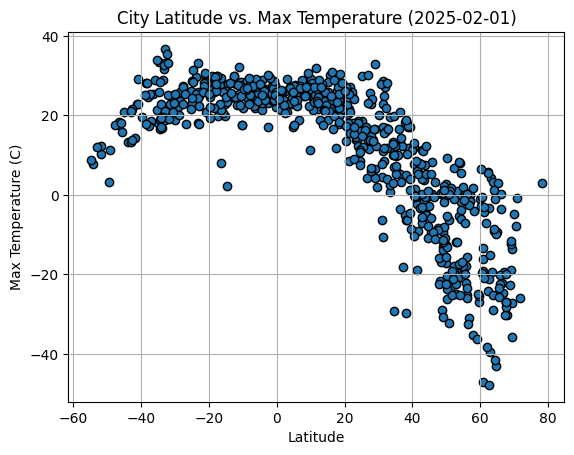

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2025-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")  
plt.grid(True)  


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

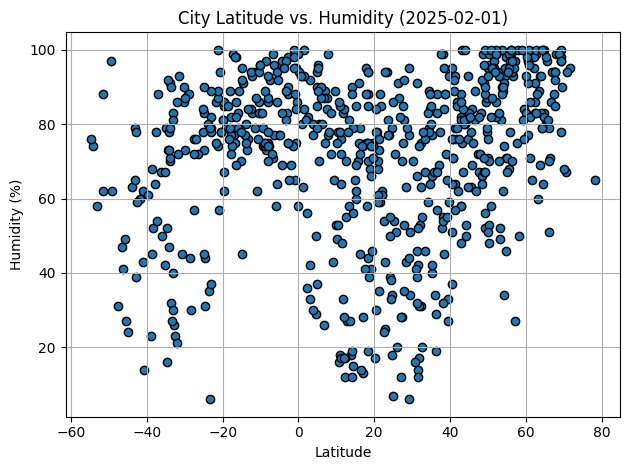

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

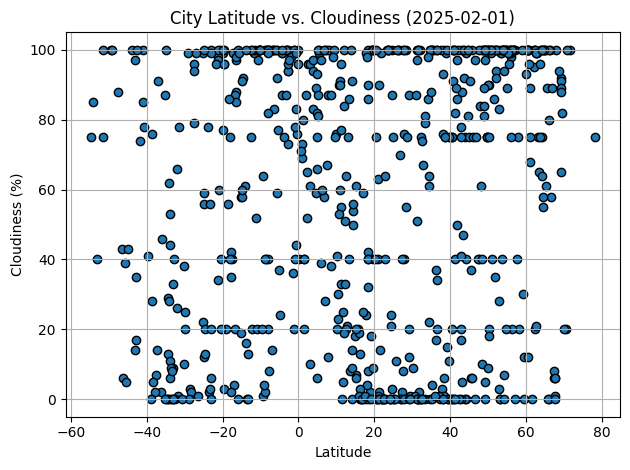

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

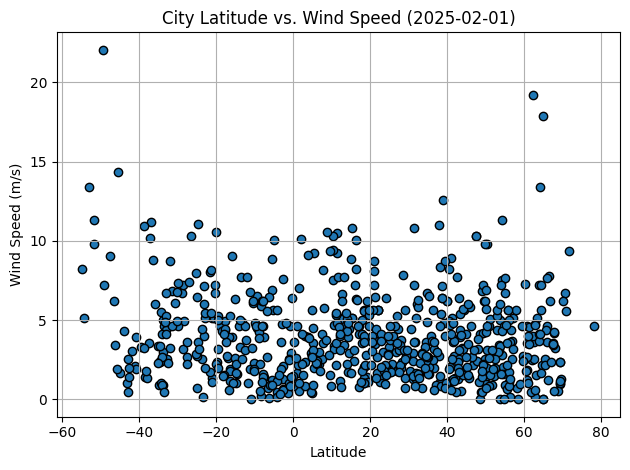

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")  
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col, title):
    x_values = df[x_col]
    y_values = df[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (df[x_col].min(), df[y_col].min()), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    print(f"The r-value is: {rvalue**2}")
    plt.tight_layout()
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,anadyr,64.7500,177.4833,0.28,100,100,17.88,RU,1738535335
3,longyearbyen,78.2186,15.6401,2.91,65,75,4.63,SJ,1738535337
5,gharo,24.7424,67.5856,17.59,18,3,3.31,PK,1738535340
6,sant feliu de guixols,41.7833,3.0333,5.75,86,97,2.74,ES,1738535341
9,tiksi,71.6872,128.8694,-25.95,95,100,9.33,RU,1738535344


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,18.40,47,43,6.22,NZ,1738535334
2,avarua,-21.2078,-159.7750,30.03,74,34,5.14,CK,1738535336
4,alice springs,-23.7000,133.8833,29.75,35,2,2.57,AU,1738535339
7,port-aux-francais,-49.3500,70.2167,3.21,97,100,22.05,TF,1738535342
8,wangon,-7.5161,109.0539,24.34,92,100,1.39,ID,1738535343


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7029751880459658


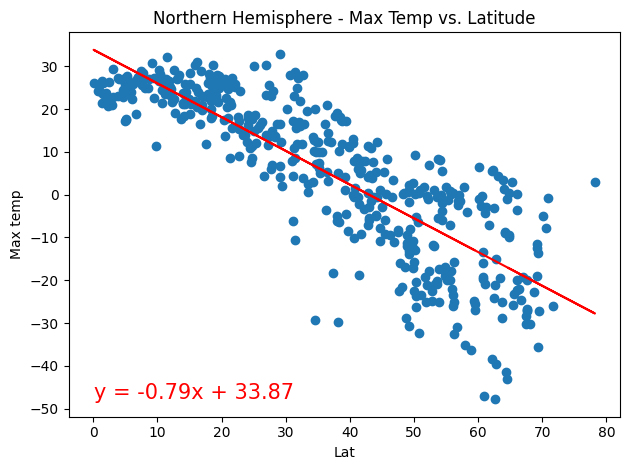

In [19]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude")



The r-value is: 0.17255230409574393


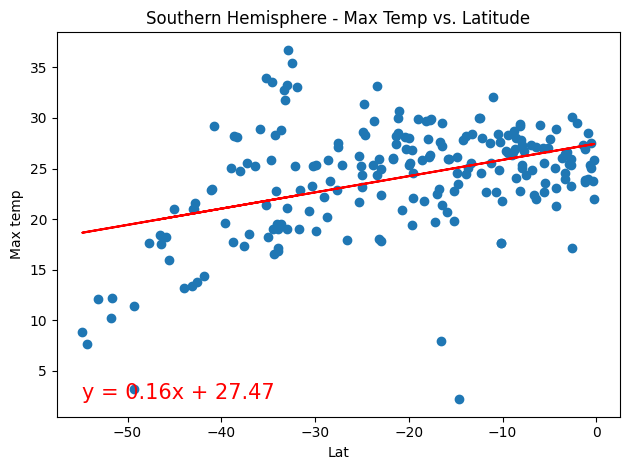

In [20]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude")


**Discussion about the linear relationship:**

Northern Hemisphere - Max Temp vs. Latitude

In the Northern Hemisphere, a moderately strong negative correlation (R-value of approximately 0.78) exists between latitude and maximum temperature. As latitude increases, moving north and away from the equator, the maximum temperature tends to decrease. This aligns with general climate patterns. The linear regression model (y = -0.79x + 33.87) suggests that for every degree of latitude increase, the maximum temperature is predicted to fall by 0.79 units (Celsius or Fahrenheit, depending on your data's units). While the trend is clear, the scatter plot indicates that other factors beyond latitude also influence temperature, and some outliers suggest local weather anomalies.

Southern Hemisphere - Max Temp vs. Latitude

In the Southern Hemisphere, the relationship between latitude and maximum temperature is much weaker (R-value of approximately 0.17) and shows a positive correlation. As latitude increases, moving north towards the equator, the maximum temperature tends to increase, though the relationship is not as pronounced as in the Northern Hemisphere. The linear regression model (y = 0.16x + 27.47) suggests a smaller temperature increase of 0.16 units per degree of latitude. The high degree of scatter in the data points indicates that latitude is not a strong predictor of maximum temperature in the Southern Hemisphere, likely due to the larger proportion of ocean area, which moderates temperature fluctuations.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1286430979178099


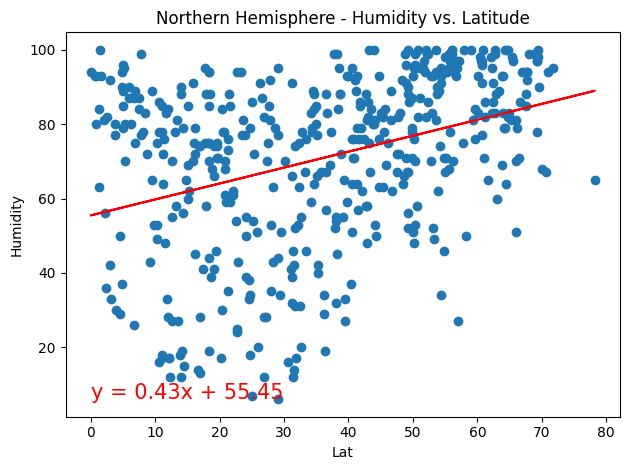

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, "Lat", "Humidity", "Northern Hemisphere - Humidity vs. Latitude")


The r-value is: 0.2346208624128116


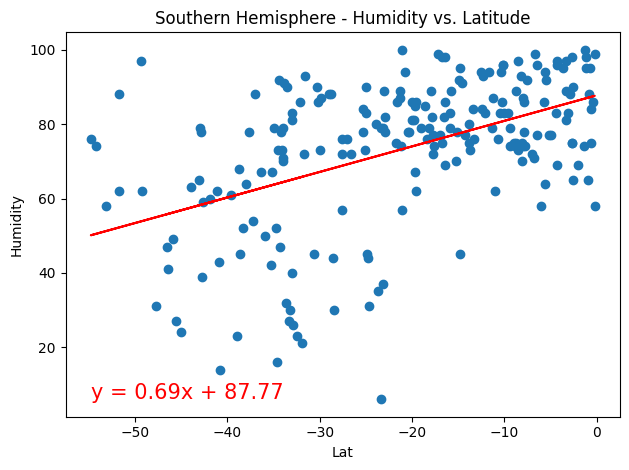

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, "Lat", "Humidity", "Southern Hemisphere - Humidity vs. Latitude")

**Discussion about the linear relationship:** 

Northern Hemisphere - Humidity vs. Latitude

The linear regression models the relationship between latitude and humidity in the Northern Hemisphere, exploring if there's a correlation between how far north a city is and its humidity levels. The scatter plot shows a weak positive correlation, suggesting that there's a slight tendency for humidity to increase as latitude increases. However, the R-value of 0.13 indicates that the relationship is very weak, and latitude is not a strong predictor of humidity. The data points are widely scattered, implying that other factors significantly influence humidity. The regression line equation, y = 0.43x + 55.45, indicates that for every degree of latitude increase, humidity is predicted to rise by 0.43 units.

Southern Hemisphere - Humidity vs. Latitude

The scatter plot shows a weak positive correlation, similar to the Northern Hemisphere, with a slight tendency for humidity to increase as latitude increases (moving closer to the equator). The R-value of 0.23 suggests a slightly stronger relationship compared to the Northern Hemisphere, but it's still considered weak. The data points are quite dispersed, indicating that factors other than latitude play a more dominant role in determining humidity levels. The regression equation, y = 0.69x + 87.77, suggests that for each degree of latitude increase, humidity is predicted to increase by 0.69 units. However, given the weak correlation, this prediction should be interpreted cautiously.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.038916823194605016


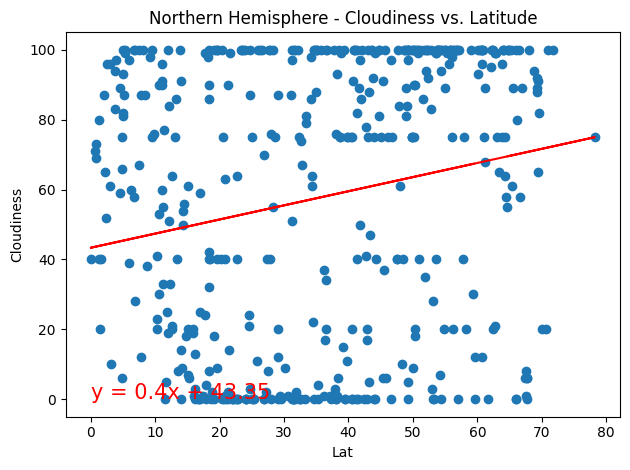

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness", "Northern Hemisphere - Cloudiness vs. Latitude")


The r-value is: 0.0902728229868122


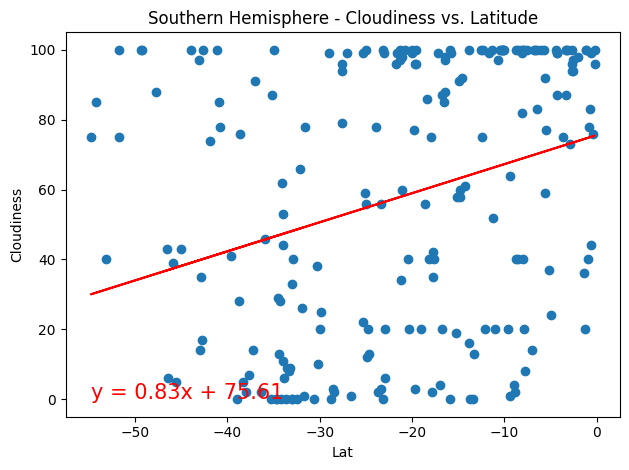

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude")

**Discussion about the linear relationship:** 

Northern Hemisphere - Cloudiness vs. Latitude

The scatter plot indicates a very weak positive correlation, suggesting a slight tendency for cloudiness to increase as latitude increases. However, the R-value of 0.04 indicates that the relationship is practically non-existent, and latitude is a very poor predictor of cloudiness. The data points are widely dispersed, showing that many other factors influence cloud cover. The regression line equation, y = 0.4x + 41.13, suggests a minimal increase in cloudiness with latitude, but given the extremely weak correlation, this prediction has little practical significance.

Southern Hemisphere - Cloudiness vs. Latitude

Similar to the Northern Hemisphere, the scatter plot suggests a weak positive correlation, with a slight tendency for cloudiness to increase as latitude increases (moving closer to the equator). The R-value of 0.09 indicates a very weak relationship, slightly stronger than in the Northern Hemisphere but still not meaningful. The data points are widely scattered, indicating that factors other than latitude are the primary drivers of cloudiness. The regression equation, y = 0.83x + 75.61, suggests a more substantial increase in cloudiness with latitude compared to the Northern Hemisphere. However, due to the weak correlation, this prediction should be interpreted cautiously and is not reliably supported by the data.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0019966103527803186


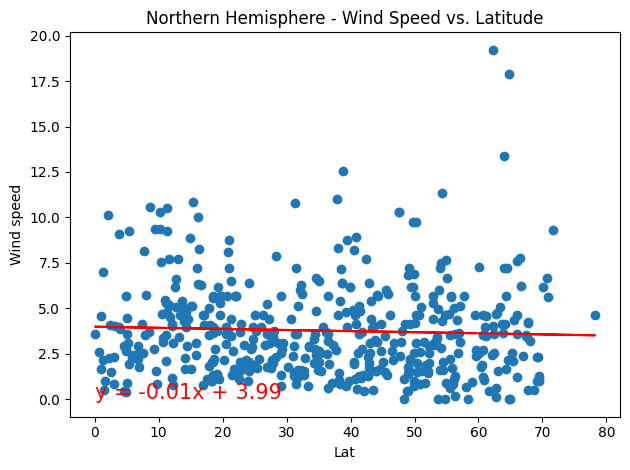

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed", "Northern Hemisphere - Wind Speed vs. Latitude")


The r-value is: 0.09722060762466411


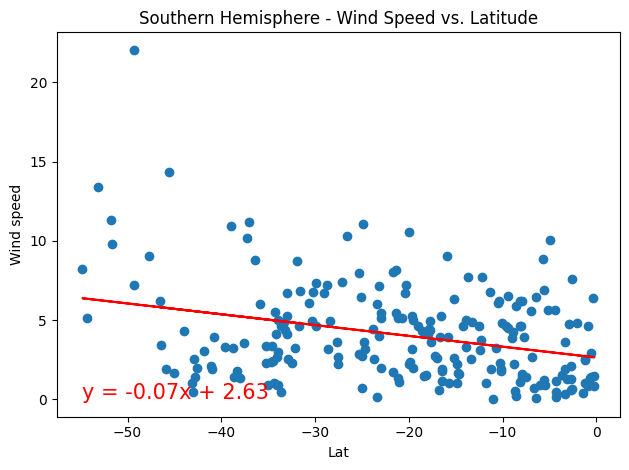

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude")

**Discussion about the linear relationship:** 

Northern Hemisphere - Wind Speed vs. Latitude

The scatter plot shows a very weak negative correlation, suggesting a slight tendency for wind speed to decrease as latitude increases. However, the R-value of approximately 0.002 indicates that the relationship is essentially non-existent, and latitude is an extremely poor predictor of wind speed. The data points are widely scattered, emphasizing that numerous other factors overwhelmingly influence wind speed. The regression line equation, y = -0.01x + 3.99, suggests a minimal decrease in wind speed with latitude, but due to the extremely weak correlation, this prediction holds no practical significance.

Southern Hemisphere - Wind Speed vs. Latitude

The scatter plot indicates a weak negative correlation, similar to the Northern Hemisphere, with a slight tendency for wind speed to decrease as latitude increases (moving closer to the equator). The R-value of approximately 0.097, while higher than in the Northern Hemisphere, still indicates a weak relationship. The data points are quite dispersed, suggesting that variables other than latitude are the primary determinants of wind speed. The regression equation, y = -0.07x + 2.63, implies a more noticeable decrease in wind speed with latitude compared to the Northern Hemisphere. 